# Correlation and regression analysis

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# READ DATASET
data = pd.read_csv(r"F:\googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Perform data cleaning and preprocessing if necessary. Handle missing values, duplicate entries, or inconsistent data to ensure the quality of your analysis.

In [4]:
#Checking there are no Missing Values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#replacing with mean values
data["Rating"].fillna(data["Rating"].mean(), inplace = True)
data["Type"].fillna(data["Type"].mode().iloc[0], inplace = True)
data["Content Rating"].fillna(data["Content Rating"].mode().iloc[0], inplace=True)
data["Current Ver"].fillna(data["Current Ver"].mode().iloc[0], inplace = True)
data["Android Ver"].fillna(data["Android Ver"].mode().iloc[0], inplace=True)
#confirming there are no null values
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
# Check for duplicates
duplicates = data.duplicated()
duplicates = duplicates.sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 483


In [7]:
data = data.drop_duplicates()
data.shape

(10358, 13)

# Explore the distribution of variables, using descriptive statistics and visualizations

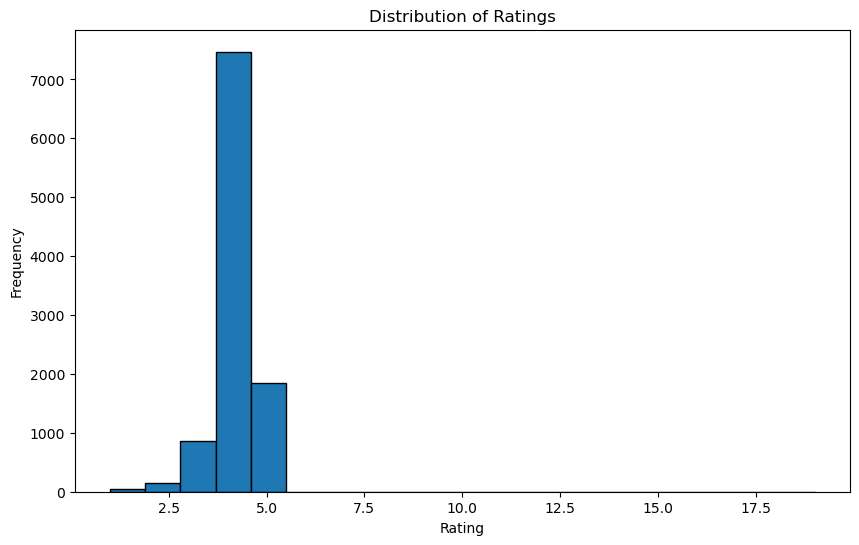

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


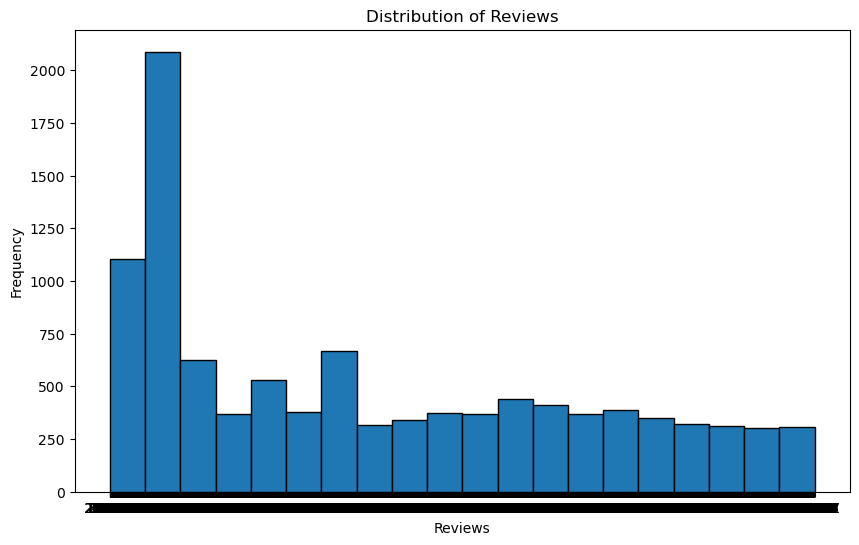

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data['Reviews'], bins=20, edgecolor='black')
plt.title('Distribution of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

# Investigate the relationship between different features

In [ ]:
# Create a stacked bar plot
contingency_table = pd.crosstab(data['Size'], data['Reviews'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Impact of App size on Reviews')
plt.xlabel('Size')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Rating',y='Installs',data=data)
plt.title('Rating vs Installs')
plt.show()

# Identify the most popular app categories and visualize their distribution using bar charts or pie charts.

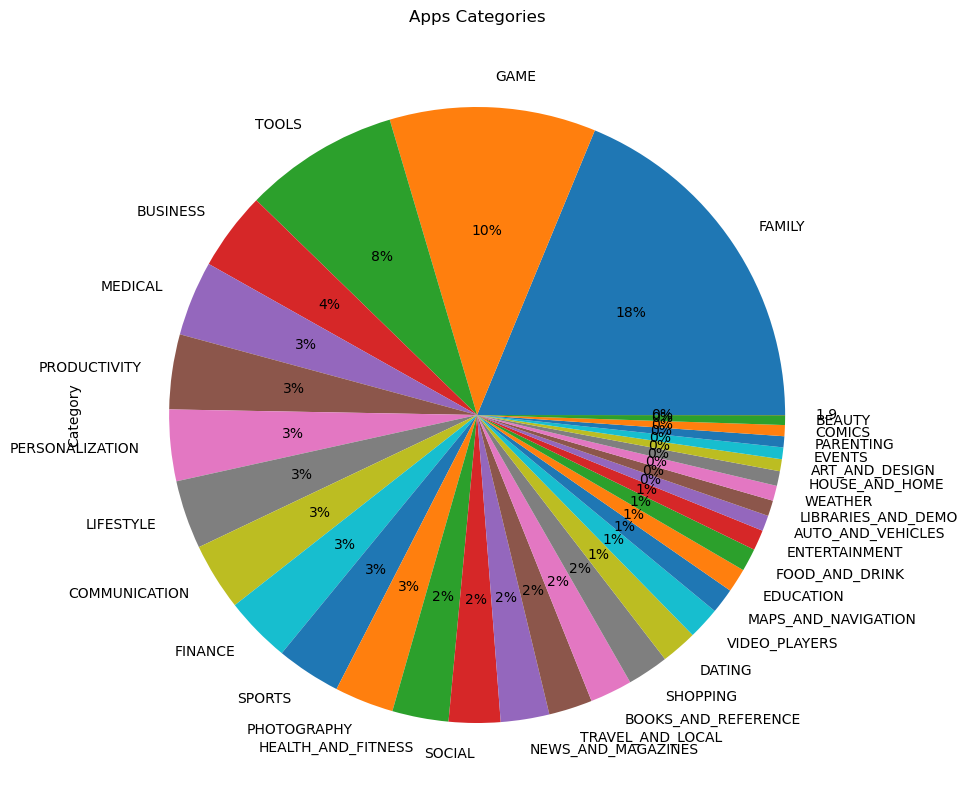

In [26]:
plt.figure(figsize=(10,10))
data['Category'].value_counts().plot.pie(autopct='%d%%')
plt.title('Distribution of Categories')
plt.show()


# Extract insights from the dataset. For instance, you can determine which app categories tend to have higher ratings, identify the most significant factors influencing app popularity, or explore any interesting trends within the data.

In [29]:
# Calculate average ratings per app category
avg_ratings_by_category = data.groupby('Category')['Rating'].mean()

# Sort categories by average rating
avg_ratings_by_category = avg_ratings_by_category.sort_values(ascending=False)

print(avg_ratings_by_category)

Category
1.9                    19.000000
EDUCATION               4.374564
EVENTS                  4.363647
ART_AND_DESIGN          4.350462
BOOKS_AND_REFERENCE     4.311943
PERSONALIZATION         4.305620
PARENTING               4.282223
GAME                    4.277598
BEAUTY                  4.260882
HEALTH_AND_FITNESS      4.251656
SOCIAL                  4.247001
SHOPPING                4.245774
WEATHER                 4.239675
SPORTS                  4.219279
PRODUCTIVITY            4.200279
FAMILY                  4.191406
AUTO_AND_VEHICLES       4.190824
MEDICAL                 4.185279
PHOTOGRAPHY             4.183479
LIBRARIES_AND_DEMO      4.181962
HOUSE_AND_HOME          4.169001
FOOD_AND_DRINK          4.168388
COMMUNICATION           4.158216
COMICS                  4.156445
NEWS_AND_MAGAZINES      4.140784
ENTERTAINMENT           4.136036
BUSINESS                4.135958
FINANCE                 4.135315
LIFESTYLE               4.113799
TRAVEL_AND_LOCAL        4.107539
V

In [1]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=Reviews)
plt.title(f'Distribution of {Reviews}')
plt.xlabel(Reviews)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

# Summarize your findings and present them in a clear and concise manner, using tables, charts, or narrative descriptions.

In [ ]:
Highest Ratings: EDUCATION= 4.374564
Most Popular App Category: FAMILY= 18%
Most app ratings are between 4.0 and 4.5 
Most apps have above 2000 reviews